In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:
insurance = pd.read_excel('Dataset .xlsx')
#insurance.head(20)
#print(insurance.isna().sum().sort_values())
for col in insurance.columns:
    if insurance[col].isna().any():
      print(col,insurance[col].isna().sum())

patient_body_mass_index 990
patient_year_last_admitted 11881


In [ ]:
char_features = insurance.select_dtypes(exclude=['int', 'float']).columns.tolist()
#print(char_features)

#Encoding Charecter Data
encoder = LabelEncoder()
insurance[char_features] = insurance[char_features].apply(encoder.fit_transform)
insurance.head()

,patient_id,patient_years_with_insurance_with_us,patient_last_year_regular_checkup,patient_participates_in_adventure_sports,patient_occupation,patient_visited_doctor_last_1_year,patient_cholesterol_level,patient_average_daily_steps,patient_age,patient_has_heart_disease_history,...,patient_smoking_status,patient_year_last_admitted,patient_location,patient_weight,patient_covered_by_other_insurance_company,patient_alcohol_consumption,patient_exercise_regimen,patient_weight_change_last_year,patient_body_fat_percentage,patient_insurance_cost
0,222302,3,1,1,1,2,0,4866,28,1,...,0,NaN,3,67,0,2,1,1,25,20978
1,145132,0,0,0,2,4,1,6411,50,0,...,1,NaN,6,58,0,2,1,3,27,6170
2,244767,1,0,0,0,4,3,4509,68,0,...,1,NaN,6,73,0,0,0,0,32,28382
3,85953,7,4,0,0,2,2,6214,51,0,...,0,NaN,3,71,1,2,2,3,37,27148
4,18163,3,1,0,2,2,1,4938,44,0,...,2,2004.0,1,74,0,1,0,0,34,29616


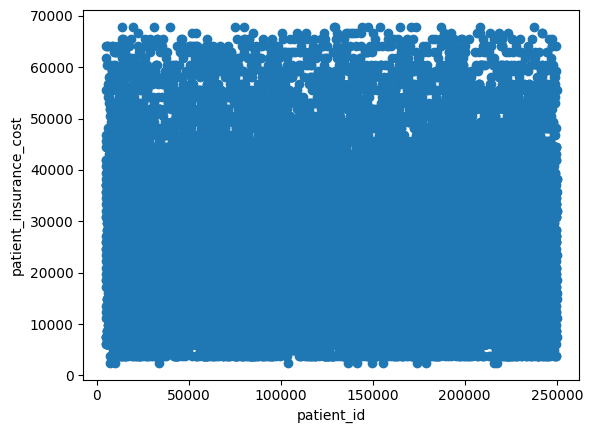

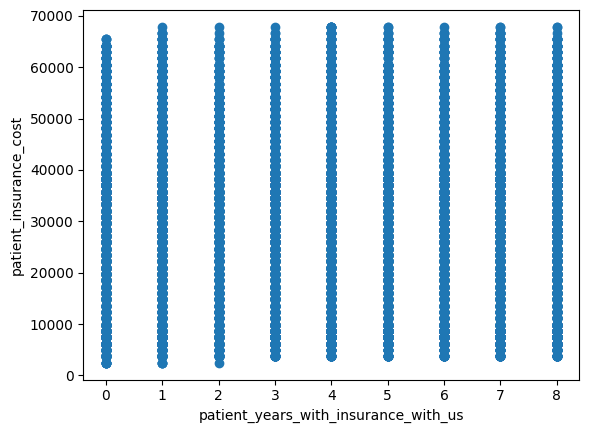

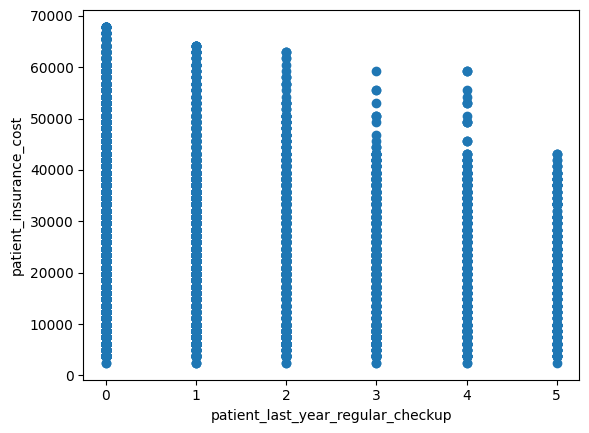

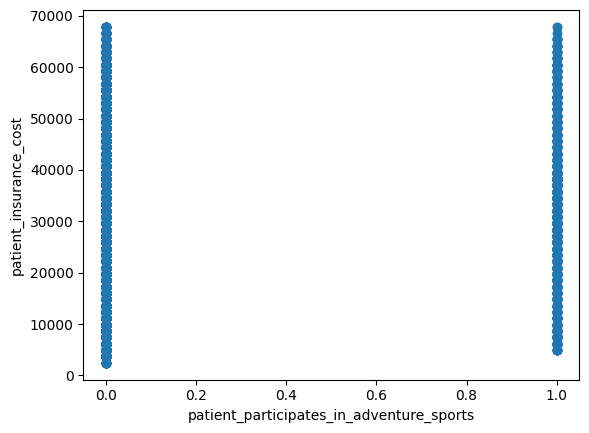

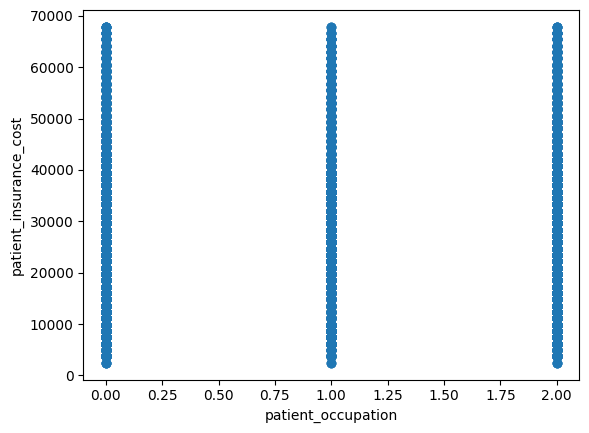

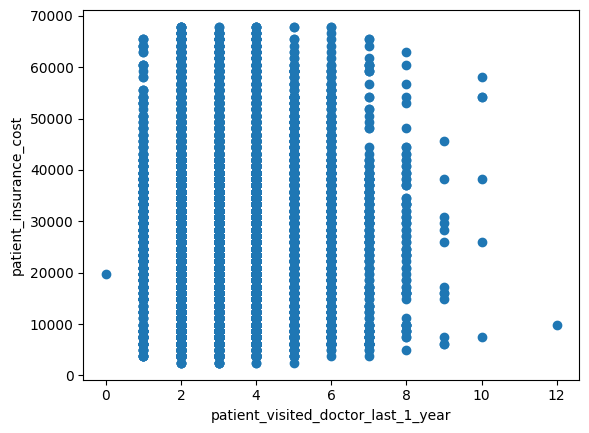

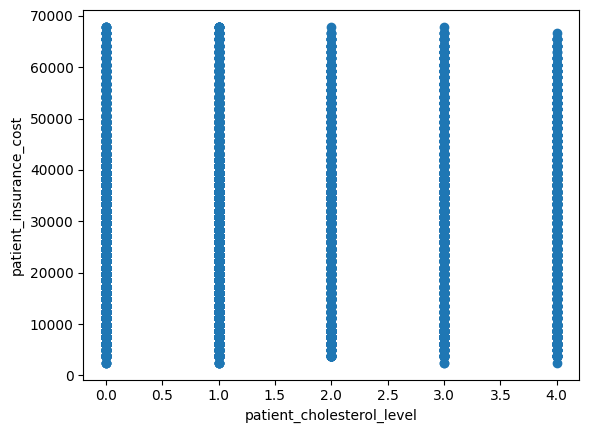

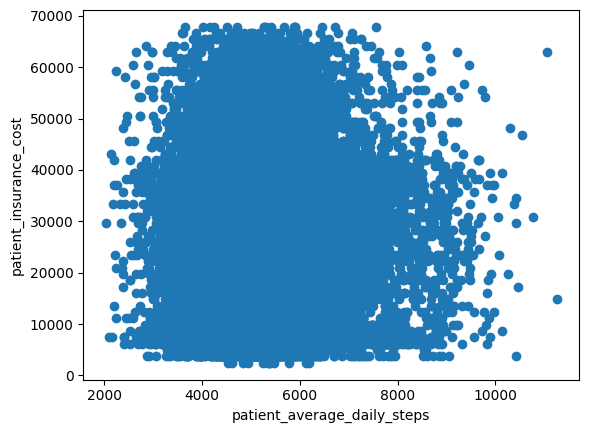

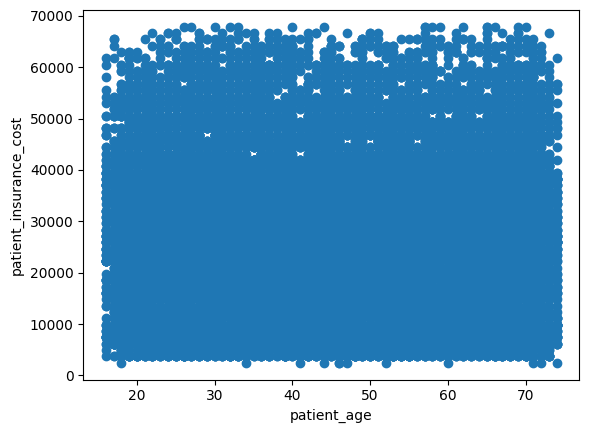

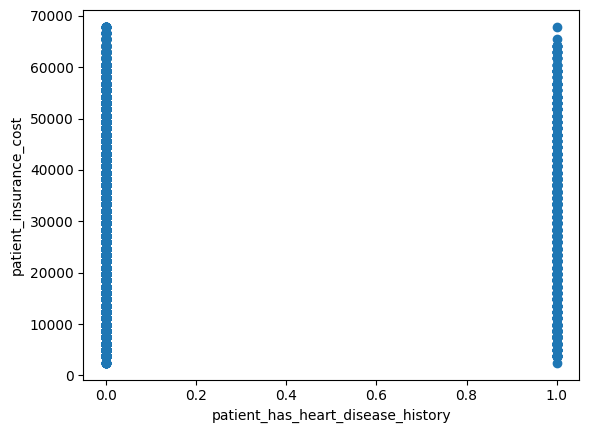

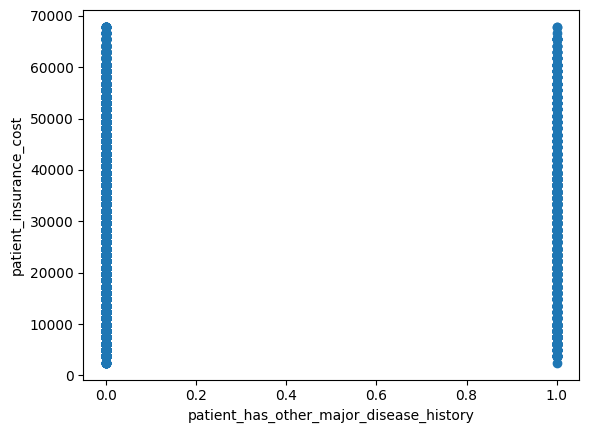

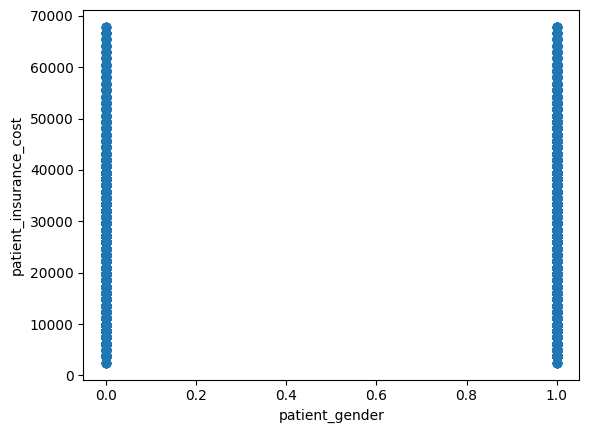

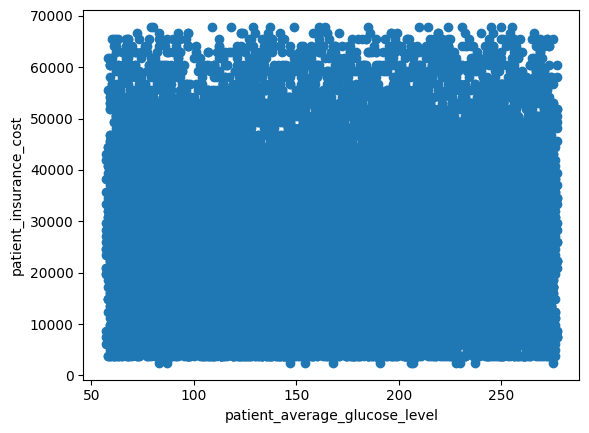

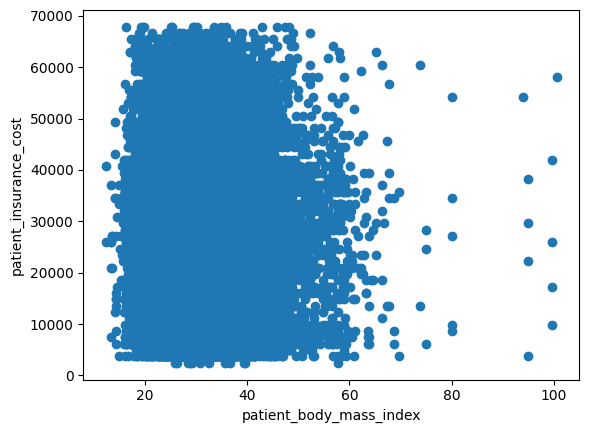

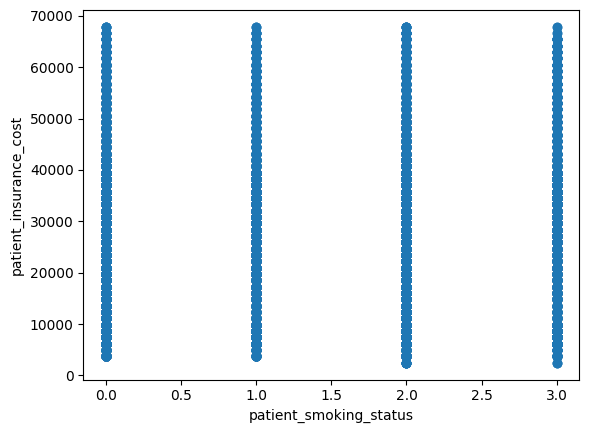

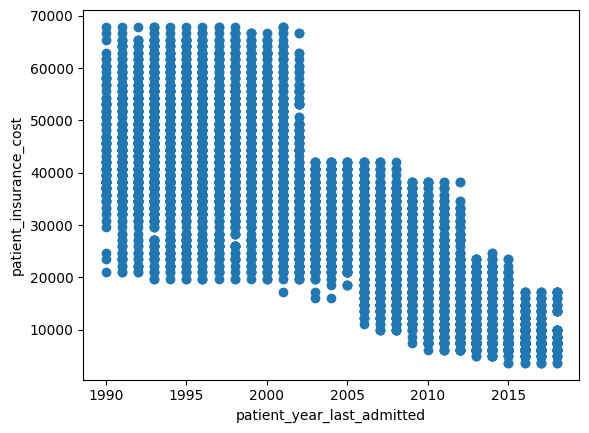

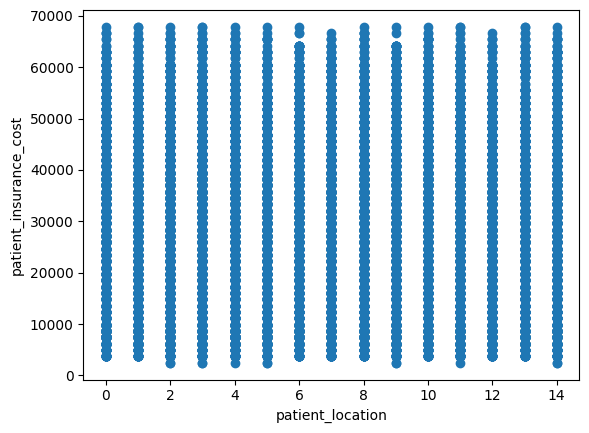

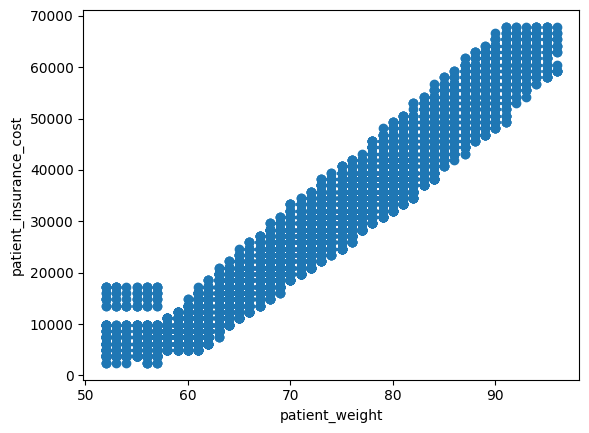

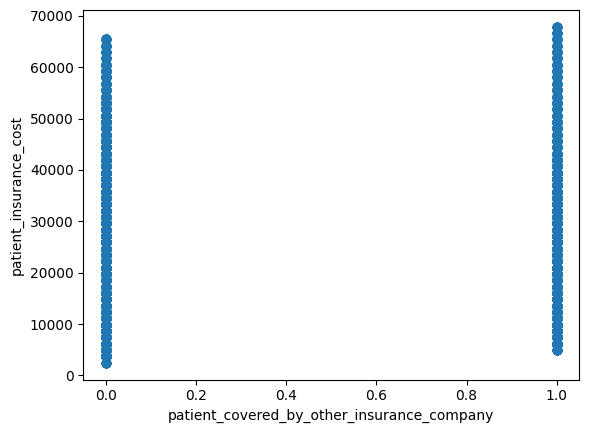

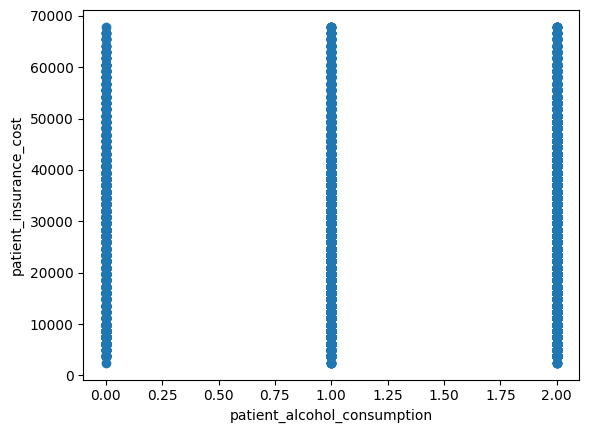

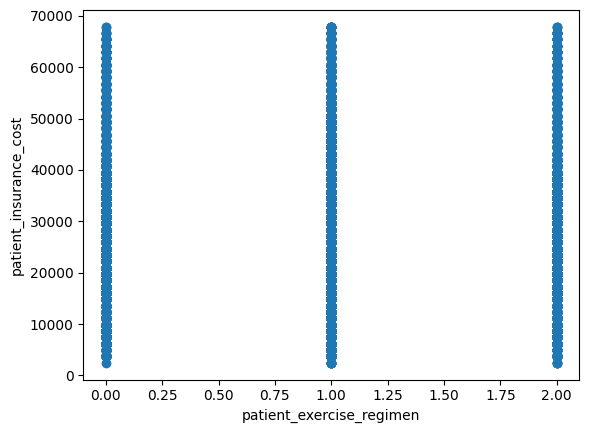

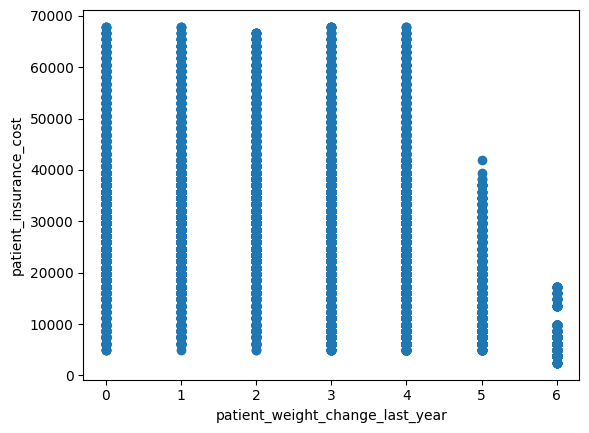

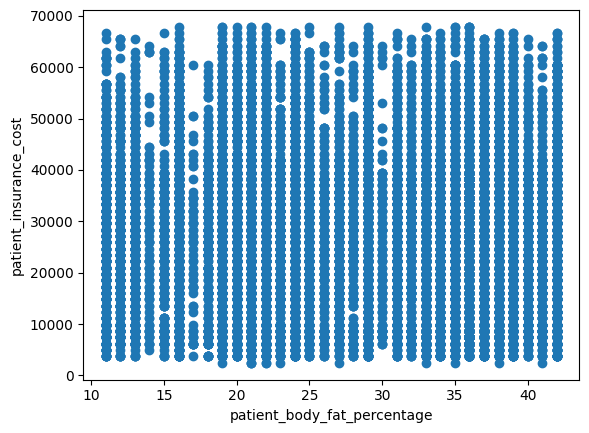

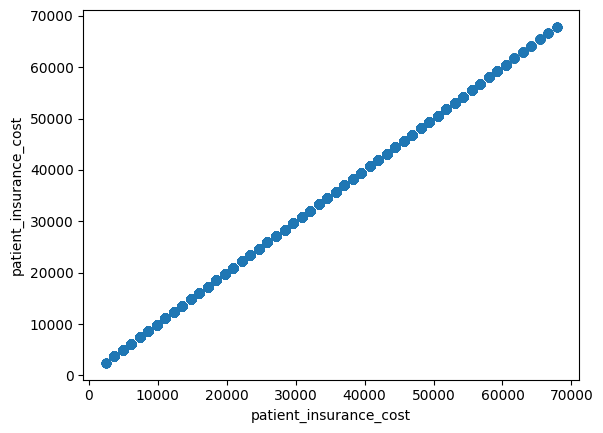

In [ ]:
for col in insurance.columns:
    plt.scatter(insurance[col],insurance['patient_insurance_cost'])
    plt.xlabel(col)
    plt.ylabel('patient_insurance_cost')
    plt.show()

In [ ]:
#crearing correlation matrix
corr_matrix = insurance.corr()

cdf = pd.DataFrame(corr_matrix)
rel_of_insu_rest = cdf.iloc[:,-1].to_list()
to_drop = []
for cm in rel_of_insu_rest:
  if cm < 0:
    to_drop.append(cdf.index[rel_of_insu_rest.index(cm)])
    #print(cdf.index[cdf_lst.index(cm)],cm)

#print(to_drop)

In [ ]:
#insurance = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(insurance)).values

In [ ]:
X = insurance.drop(to_drop + ['patient_insurance_cost'] ,axis=1).values
y = insurance['patient_insurance_cost'].values


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,stratify=y,shuffle=True)

In [ ]:
# Define the pipeline for imputing and scaling
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler1', StandardScaler()),
    ('scaler2', MinMaxScaler(feature_range=(0,1)))
])

In [ ]:
# Define the model
model = RandomForestRegressor()

# Define the full pipeline
full_pipeline = Pipeline([
    ('preprocessing', pipeline),
    ('model', model)
])


In [ ]:

# Define the parameter grid
param_distributions = {
    'model__n_estimators': [100, 200, 300, 400, 500],
    'model__max_features': ['sqrt', 'log2'],
    'model__max_depth': [None, 10, 20, 30, 40, 50],
    'model__min_samples_split': [2, 5, 10, 20],
    'model__min_samples_leaf': [1, 2, 4, 10],
    'model__bootstrap': [True, False]
}


# Perform grid search
random_search = RandomizedSearchCV(estimator=full_pipeline, param_distributions=param_distributions, cv=3, n_jobs=2, scoring='r2', n_iter=10)
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# Best parameters
print("Best parameters found: ", random_search.best_params_.values())

Best parameters found:  dict_values([200, 10, 4, 'log2', 30, True])


In [ ]:
# Evaluate on the testing data

rmse = mean_squared_error(y_test,y_pred,squared=False)
r2 = r2_score(y_test,y_pred)
print(f'R^2 score: {r2:.4f}')
print(f'RMSE score: {rmse}')

R^2 score: 0.9501
RMSE score: 3200.7982758537646


In [ ]:
#Prediton on test data
actual_vs_prediction = pd.DataFrame(columns=['Actual Labels', 'Predicted Labels'])
y_test, y_pred = actual_vs_prediction['Actual Labels'] , actual_vs_prediction['Predicted Labels']

actual_vs_prediction.head(10)

,Actual Labels,Predicted Labels
0,28382,26278.656685
1,35786,28523.934765
2,34552,25191.367321
3,7404,27833.992949
4,41956,28799.771749
5,54296,27354.678761
6,24680,25082.939177
7,13574,25409.484693
8,30850,26721.195271
9,12340,25771.790197
